In [ ]:
!git clone https://github.com/aashishksahu/TestBench.git

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8]

data = pd.DataFrame(pd.read_csv('TestBench/train.csv'))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


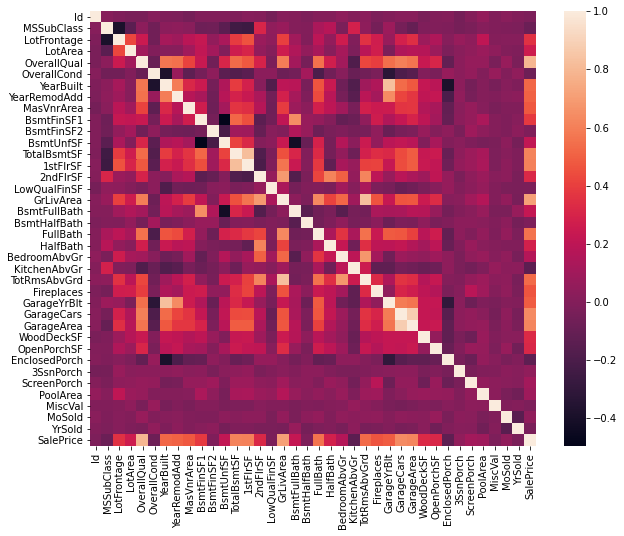

In [3]:
corr_mat = data.corr()

sns.heatmap(corr_mat)

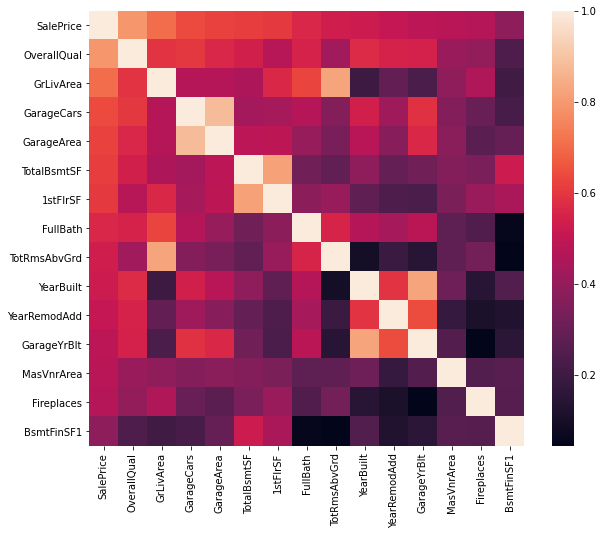

In [4]:
# find out top 15 correlating features

n_features = 15

top_features = list(corr_mat.nlargest(n_features, 'SalePrice')['SalePrice'].index)
top_cor = data[top_features].corr()

sns.heatmap(top_cor, square=True)

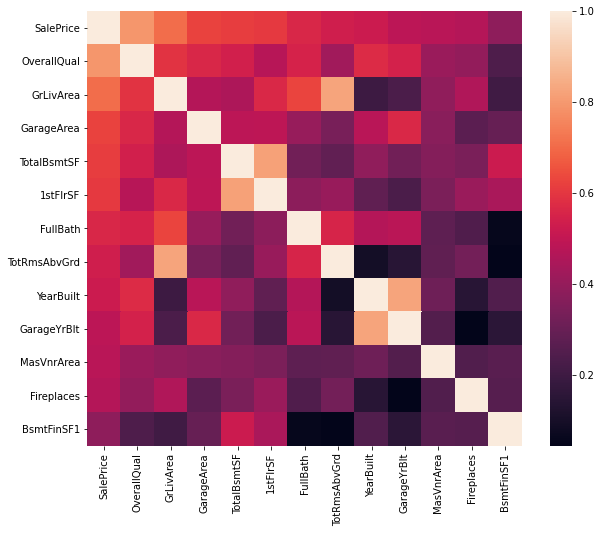

In [5]:
if 'GarageCars' in top_features:
    # removing features that have similar correlation according to the above heat map
    top_features.remove('GarageCars')

if 'YearRemodAdd' in top_features:
    # removing features that have similar correlation according to the above heat map
    top_features.remove('YearRemodAdd')
    
top_cor = data[top_features].corr()

sns.heatmap(top_cor, square=True)

In [6]:
print('final list of features:')
print()
print(top_features)

final list of features:

['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1']


In [7]:
data[top_features]

,SalePrice,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,GarageYrBlt,MasVnrArea,Fireplaces,BsmtFinSF1
0,208500,7,1710,548,856,856,2,8,2003,2003.0,196.0,0,706
1,181500,6,1262,460,1262,1262,2,6,1976,1976.0,0.0,1,978
2,223500,7,1786,608,920,920,2,6,2001,2001.0,162.0,1,486
3,140000,7,1717,642,756,961,1,7,1915,1998.0,0.0,1,216
4,250000,8,2198,836,1145,1145,2,9,2000,2000.0,350.0,1,655
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,6,1647,460,953,953,2,7,1999,1999.0,0.0,1,0
1456,210000,6,2073,500,1542,2073,2,7,1978,1978.0,119.0,2,790
1457,266500,7,2340,252,1152,1188,2,9,1941,1941.0,0.0,2,275
1458,142125,5,1078,240,1078,1078,1,5,1950,1950.0,0.0,0,49


In [8]:
# Time to handle missing values
# Let's find out which of the features have missing values 

data[top_features].isnull().sum()

SalePrice        0
OverallQual      0
GrLivArea        0
GarageArea       0
TotalBsmtSF      0
1stFlrSF         0
FullBath         0
TotRmsAbvGrd     0
YearBuilt        0
GarageYrBlt     81
MasVnrArea       8
Fireplaces       0
BsmtFinSF1       0
dtype: int64

In [9]:
# Therefore, we can drop the rows with missing rows
# before that let's make a copy of our dataset

# selecting only complete data rows
data_cleaned = data[top_features].fillna(method='ffill')

data_cleaned.isnull().sum()

SalePrice       0
OverallQual     0
GrLivArea       0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
GarageYrBlt     0
MasVnrArea      0
Fireplaces      0
BsmtFinSF1      0
dtype: int64

In [10]:
# Train test split
split_index = int(len(data_cleaned)*0.7)

# separating dependent variable

y_train = np.array(data_cleaned['SalePrice'].iloc[0:split_index])
# y_train = y_train.reshape([len(y_train), 1])

y_test = np.array(data_cleaned['SalePrice'].iloc[split_index:])
# y_test = y_test.reshape([len(y_test), 1])

if 'SalePrice' in top_features:
    top_features.remove('SalePrice')

# training and testing input
x_train = np.array(data_cleaned[top_features][0:split_index])

x_test = np.array(data_cleaned[top_features][split_index:])

print('training input size: ', x_train.shape)
print('training output size: ', y_train.shape)
print('\ntesting input size: ', x_test.shape)
print('testing output size: ', y_test.shape)

training input size:  (1021, 12)
training output size:  (1021,)

testing input size:  (439, 12)
testing output size:  (439,)


In [11]:
from sklearn.ensemble import RandomForestRegressor 

model = RandomForestRegressor()

model.fit(x_train, y_train)

train_prediction = model.predict(x_train)
test_prediction = model.predict(x_test)

In [12]:
# evaluating RMSE 
from sklearn.metrics import r2_score

print('R2_train: ', r2_score(y_train, train_prediction))
print('R2_test: ',  r2_score(y_test, test_prediction))

R2_train:  0.9751841426161371
R2_test:  0.7999762779457354


In [13]:
prediction_data = pd.DataFrame(pd.read_csv('TestBench/test.csv'))

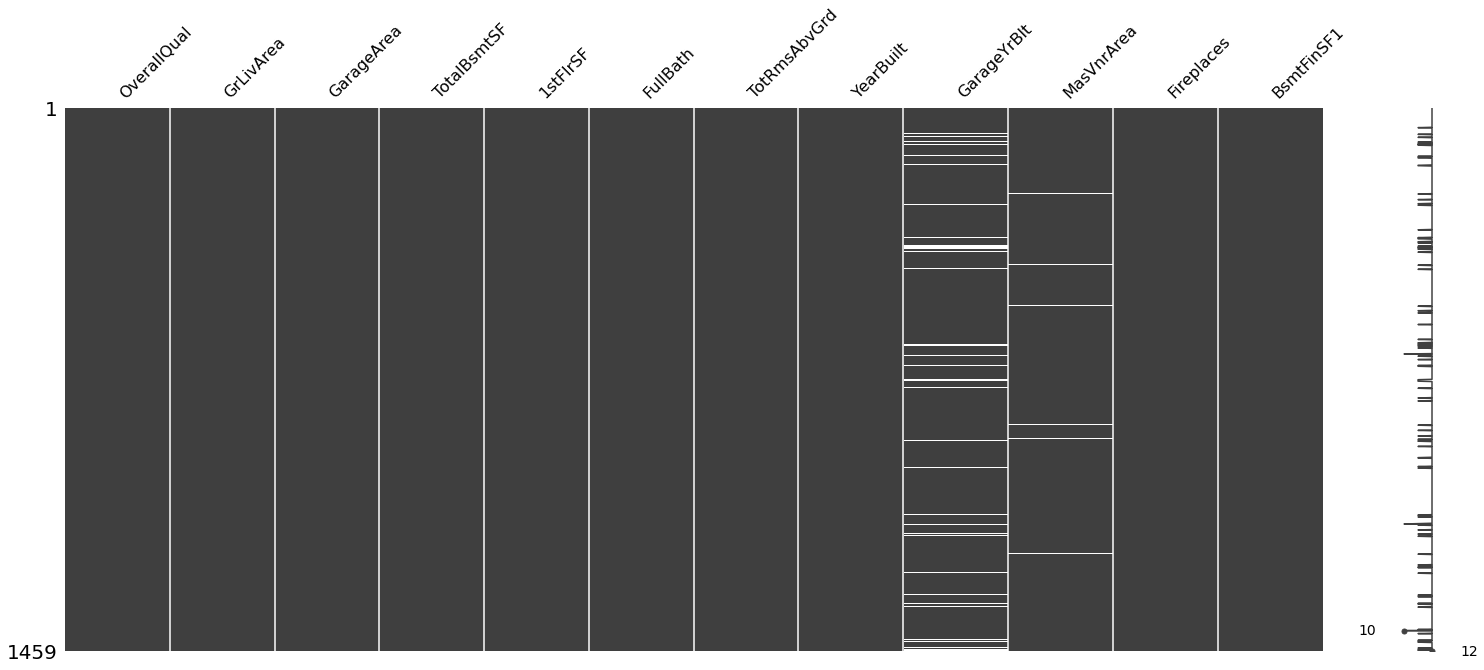

In [14]:
import missingno as msno
msno.matrix(prediction_data[top_features])

In [15]:
prediction_data = prediction_data.fillna(method='ffill')

In [16]:
import csv

final_predictions = model.predict(prediction_data[top_features])

pred_list = [['Id', 'SalePrice']]

for i in range(len(prediction_data)):
    pred_list.append([prediction_data['Id'].iloc[i], final_predictions[i]])


with open("test_prediction.csv","w+") as my_csv:
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(pred_list)